In [ ]:
# working with the data and vizualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre- processing
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# evaluating
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# seed
RSEED = 10

In [ ]:
clustering_df = pd.read_csv("../ClusteringDocs/Concatenated-DF.csv")

In [ ]:
clustering_df

,Unnamed: 0,bibliometr,analysi,explain,artifici,intellig,field,jose,alonso,ciro,...,c69c364e62bc6c7ff5,woebot,e4,edagsr,empatica,comresearche4,comwatch,taylorfr,combookse9781351440219,Y-LABEL
0,0,0.0,0.10307,0.347170,0.774069,0.397327,0.318236,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AlgorithmicTransparency
1,1,0.0,0.06503,0.517247,0.387035,0.397327,0.318236,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ArtificialIntelligenceExplainability
2,2,0.0,0.00000,0.299036,0.387035,0.501371,0.318236,1.599487,3.90713,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ArtificialIntelligenceExplainability
3,3,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble
4,4,0.0,0.00000,0.000000,0.000000,0.000000,0.318236,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GenderBias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.0,0.06503,0.236980,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble
196,196,0.0,0.06503,0.149518,0.000000,0.000000,0.318236,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble
197,197,0.0,0.00000,0.347170,0.613435,0.397327,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AlgorithmicTransparency
198,198,0.0,0.10307,0.149518,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FilterBubble


<h2>Dimensions reduction</h2>
Due to the fact we have tousends of terms that represent a document vector.<br>
We would like to extract the important features from them and still preserve<br>
the varity and the trends in the data.<br>
Therefor we will perform a dimensions reduction using PCA.

In [ ]:
cluster_features_df = clustering_df.iloc[:, :clustering_df.shape[1]-1]
cluster_categories_df = clustering_df.iloc[:, clustering_df.shape[1]-1:]

In [ ]:
# lets choose the create 75 components
components = 75

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(cluster_features_df)

PCA(n_components=75)

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[79.92321007  0.87308843  0.66966663  0.56891376  0.41047195  0.39802246
  0.35897587  0.34632238  0.33025262  0.32441648  0.31969521  0.31660282
  0.30174451  0.29547554  0.26886018  0.25973593  0.23746853  0.2256621
  0.21331166  0.21065443  0.20224644  0.19976762  0.19760819  0.19113115
  0.18464433  0.17968191  0.17338523  0.16692261  0.16131399  0.15804502
  0.15705253  0.15413157  0.14905396  0.14783115  0.14565808  0.14378134
  0.14183912  0.14043848  0.1368497   0.13541414  0.13348063  0.13245029
  0.13104903  0.1288298   0.12738851  0.12643199  0.12578162  0.12327604
  0.12228209  0.1207622   0.11976106  0.11780374  0.11616146  0.1144269
  0.11355901  0.11289489  0.10939897  0.10789367  0.10670192  0.10507034
  0.10378693  0.10319556  0.10106393  0.09959007  0.0990057   0.09525075
  0.09317162  0.09297691  0.09209235  0.09031247  0.08808273  0.0870754
  0.08681962  0.08509685  0.08399135]



In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[79.92321007 80.7962985  81.46596513 82.03487889 82.44535084 82.8433733
 83.20234917 83.54867155 83.87892418 84.20334065 84.52303586 84.83963868
 85.14138319 85.43685873 85.70571891 85.96545485 86.20292338 86.42858547
 86.64189714 86.85255156 87.054798   87.25456562 87.45217381 87.64330495
 87.82794928 88.00763119 88.18101642 88.34793903 88.50925302 88.66729804
 88.82435056 88.97848214 89.1275361  89.27536725 89.42102533 89.56480667
 89.70664579 89.84708427 89.98393397 90.11934811 90.25282874 90.38527903
 90.51632806 90.64515787 90.77254638 90.89897837 91.02476    91.14803604
 91.27031813 91.39108033 91.51084139 91.62864512 91.74480659 91.85923349
 91.9727925  92.0856874  92.19508637 92.30298004 92.40968196 92.51475229
 92.61853922 92.72173478 92.82279871 92.92238878 93.02139448 93.11664523
 93.20981685 93.30279376 93.39488611 93.48519858 93.57328131 93.66035671
 93.74717633 93.83227318 93.91626453]



Text(0, 0.5, 'Explained variance (%)')

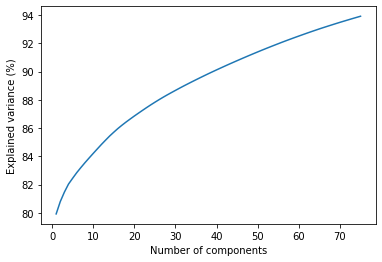

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
# extract 75 PC's from our x-features
X_pca = pca.transform(cluster_features_df)
print(X_pca.shape)

(200, 75)


As we can see we can preserve 93% of the varity in the dataset, using 75 principle components. We will use them as input for our Kmeans clustering algorithm.

<h2>Kmeans clustering</h2>

In [ ]:
def elbow_met(df):

    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df)
        kmeanModel.fit(df)
        distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

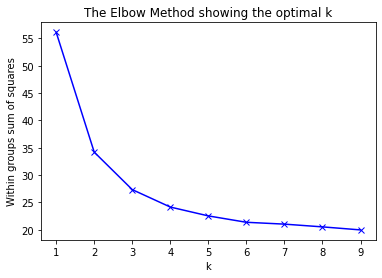

In [ ]:
# performe kmeans elbow method
kmeans_df = pd.DataFrame(X_pca)
elbow_met(kmeans_df)

By using the elbow method we can see that the desired number of clusters is between 2 or 3, yet we were asked to create 4 clusers(as the number of documents categories due to the different queries results we took them from).

In [ ]:
# performe kmeans with k=4
kmeans = KMeans(n_clusters=4, random_state=RSEED).fit(kmeans_df)

In [ ]:
# add the kmeans cluster's labels to the dataset
labels = kmeans.predict(kmeans_df)
kmeans_df['cluster'] = labels
kmeans_df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,cluster
0,99.695726,19.347548,0.005522,-13.083195,33.378044,4.845290,-17.019921,12.118413,-0.905876,-3.712208,...,-0.143937,-0.122622,-0.012137,0.085580,0.029849,0.117040,0.195675,-0.071600,0.128542,2
1,98.542518,-1.531614,0.428114,0.686932,-0.352907,-2.252861,0.107122,0.705097,-0.002494,-0.594835,...,-1.455094,-1.077201,0.432688,0.078726,0.850831,0.410556,1.736867,-4.694574,-0.926706,2
2,97.477278,-1.986501,0.061777,-0.328094,-0.690271,-2.156520,0.286183,0.450904,-0.094840,-0.827379,...,-0.251656,0.042634,0.154213,-0.151984,0.157182,0.006684,0.399975,-0.203783,0.291028,2
3,96.536696,-0.854990,0.607347,-0.741086,-0.468791,-1.982005,2.264543,0.363733,-0.567678,-1.141593,...,2.256033,-0.982223,0.549388,-1.476479,3.422879,-0.515884,1.635245,-1.006749,1.171965,2
4,95.483143,-2.031561,0.224988,-0.998435,-1.094764,-0.693021,-0.063497,-0.126436,-1.192388,-0.703183,...,0.064937,-0.009806,-0.013035,0.081859,0.000261,-0.138249,0.639791,-0.357279,-0.077455,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-95.564720,-1.609534,-1.682094,-1.630767,0.006405,0.371035,0.856949,-0.709720,0.431878,1.225296,...,-5.167843,1.025909,-1.227640,-2.007566,4.523688,-5.816109,0.893980,-0.986351,-1.632873,1
196,-96.648459,-1.226917,-1.328148,-1.736132,0.127149,1.573203,2.511703,0.315073,-0.370509,0.922160,...,0.865677,-0.557158,0.130231,-0.285115,0.896483,1.093635,0.945204,0.311556,1.079503,1
197,-97.444991,-2.658792,-1.390057,-0.073011,-0.197127,-0.948670,-0.895115,0.609017,-0.081956,0.079015,...,0.141870,-0.333957,-0.278861,-0.442914,0.311194,0.456417,-0.457272,0.232371,0.208494,1
198,-98.560198,-2.238046,-1.528516,-0.898776,-0.186190,0.245378,0.487015,0.148085,-0.340164,0.819375,...,-3.250385,-7.797452,19.947003,3.626924,-1.271148,2.145593,-0.068644,-0.745500,3.315144,1


In [ ]:
# add the category columns to the result dataframe+
docs_df_view = pd.concat([cluster_categories_df, kmeans_df], axis = 1)
docs_df_view

,Y-LABEL,0,1,2,3,4,5,6,7,8,...,66,67,68,69,70,71,72,73,74,cluster
0,AlgorithmicTransparency,99.695726,19.347548,0.005522,-13.083195,33.378044,4.845290,-17.019921,12.118413,-0.905876,...,-0.143937,-0.122622,-0.012137,0.085580,0.029849,0.117040,0.195675,-0.071600,0.128542,2
1,ArtificialIntelligenceExplainability,98.542518,-1.531614,0.428114,0.686932,-0.352907,-2.252861,0.107122,0.705097,-0.002494,...,-1.455094,-1.077201,0.432688,0.078726,0.850831,0.410556,1.736867,-4.694574,-0.926706,2
2,ArtificialIntelligenceExplainability,97.477278,-1.986501,0.061777,-0.328094,-0.690271,-2.156520,0.286183,0.450904,-0.094840,...,-0.251656,0.042634,0.154213,-0.151984,0.157182,0.006684,0.399975,-0.203783,0.291028,2
3,FilterBubble,96.536696,-0.854990,0.607347,-0.741086,-0.468791,-1.982005,2.264543,0.363733,-0.567678,...,2.256033,-0.982223,0.549388,-1.476479,3.422879,-0.515884,1.635245,-1.006749,1.171965,2
4,GenderBias,95.483143,-2.031561,0.224988,-0.998435,-1.094764,-0.693021,-0.063497,-0.126436,-1.192388,...,0.064937,-0.009806,-0.013035,0.081859,0.000261,-0.138249,0.639791,-0.357279,-0.077455,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FilterBubble,-95.564720,-1.609534,-1.682094,-1.630767,0.006405,0.371035,0.856949,-0.709720,0.431878,...,-5.167843,1.025909,-1.227640,-2.007566,4.523688,-5.816109,0.893980,-0.986351,-1.632873,1
196,FilterBubble,-96.648459,-1.226917,-1.328148,-1.736132,0.127149,1.573203,2.511703,0.315073,-0.370509,...,0.865677,-0.557158,0.130231,-0.285115,0.896483,1.093635,0.945204,0.311556,1.079503,1
197,AlgorithmicTransparency,-97.444991,-2.658792,-1.390057,-0.073011,-0.197127,-0.948670,-0.895115,0.609017,-0.081956,...,0.141870,-0.333957,-0.278861,-0.442914,0.311194,0.456417,-0.457272,0.232371,0.208494,1
198,FilterBubble,-98.560198,-2.238046,-1.528516,-0.898776,-0.186190,0.245378,0.487015,0.148085,-0.340164,...,-3.250385,-7.797452,19.947003,3.626924,-1.271148,2.145593,-0.068644,-0.745500,3.315144,1


In [ ]:
check_df = docs_df_view[["Y-LABEL",'cluster']]

In [ ]:
check_df

,Y-LABEL,cluster
0,AlgorithmicTransparency,2
1,ArtificialIntelligenceExplainability,2
2,ArtificialIntelligenceExplainability,2
3,FilterBubble,2
4,GenderBias,2
...,...,...
195,FilterBubble,1
196,FilterBubble,1
197,AlgorithmicTransparency,1
198,FilterBubble,1


<h3>Using T-SNE to visualize the clustering results</h3>
Inorder to plot the results of the clustering, we will use T-sne dimension reduction algorithm to visualize the clustering results.

In [ ]:
tsne = TSNE()
# transform the x- features
X_embedded = tsne.fit_transform(docs_df_view[docs_df_view.columns.drop(["Y-LABEL","cluster"])])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
# concanted with the y-label
embedded_df = np.concatenate((X_embedded,docs_df_view[["Y-LABEL","cluster"]]), axis=1)

In [ ]:
# rename y-col
embedded_df = pd.DataFrame(embedded_df)
embedded_df.rename(columns={2: 'Category', 3: "cluster"}, inplace=True)

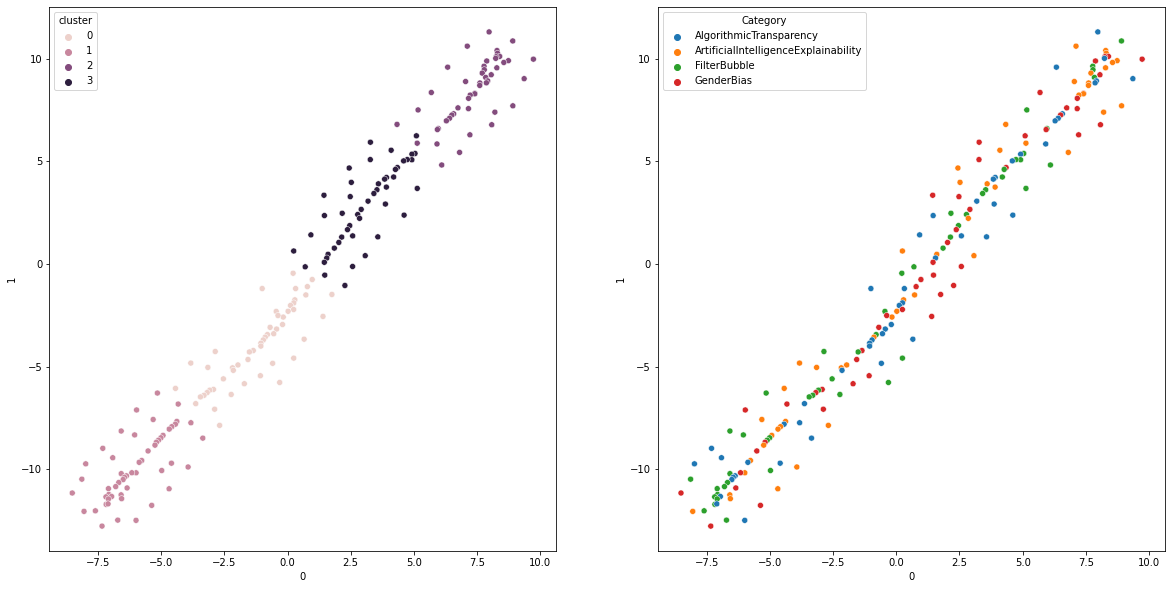

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# first subplot
sns.scatterplot(data=embedded_df, x=0, y=1, hue='cluster', ax=ax[0])

# second subplot
sns.scatterplot(data=embedded_df, x=0, y=1, hue='Category', ax=ax[1])

# show the figure
plt.show()

On the left we can see the documents colored by their cluster label(0-3), we can see that there is a trend in the data and we can divide the samples to clusters based on T-sne x, y values. Also  dividing them to 4 clusters makes sens. On the right we can see the documents colored by their category(Algorithmic fairness, Artificiall Intelligence explaiinability, filter bubble and gender bias), here we can see that there is a huge different between the predicted cluster and the category of the document, documents from different categories tend to spred across different clusters.

<H2>Evaluating the clustering results</h2>
We will evalute the clustering results using the following mesures.<br>
<ul>
  <li>
  Rand index - computes a similarity measure between two clusterings(here the documents categories and kmeans predicted clusters) by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
  </li>
  <li>
  Purity - How well we managed to reproduce the categories.
  </li>
  <li>
  MNI - How much information the clusters contain about the documents classification(labeled categories).
  </li>
</ul>


In [ ]:
def evaluate_clusters_rand_index(labels_true, labels_pred):
  """
  Calculate the Rand index of the clustering
  @params: labels_true= the category vactor of the documents
  @params: labels_pred= the predicted cluster vector of the documents.
  @returns: the rand index.
  """
  return adjusted_rand_score(labels_true, labels_pred)

In [ ]:
print("The rand index is {:.10f}".format(evaluate_clusters_rand_index(labels_true=embedded_df["Category"], labels_pred=embedded_df['cluster'])))

The rand index is -0.0002025958


In [ ]:
def evaluate_clusters_purity(evalution_df):
  """
  Calculate the purity of the clustering
  @params: evalution_df = dataframe that contains the category vactor of the documents and the predicted cluster vector of the documents
  @returns: the purity.
  """
  purity_score = 0

  grouped_by_cluster = evalution_df.groupby("cluster")

  for cluster, df in grouped_by_cluster:
    dominant_class = df["Y-LABEL"].mode()[0]
    print("The mode category of cluster {} is {}".format(cluster,dominant_class))
    number_dominant_class = len(df[df["Y-LABEL"]==dominant_class])
    purity_score+= number_dominant_class

  return purity_score/(len(evalution_df))

In [ ]:
print("The purity score is {}".format(evaluate_clusters_purity(evalution_df=check_df)))

The mode category of cluster 0 is AlgorithmicTransparency
The mode category of cluster 1 is FilterBubble
The mode category of cluster 2 is ArtificialIntelligenceExplainability
The mode category of cluster 3 is FilterBubble
The purity score is 0.31


In [ ]:
def evaluate_clustering_nmi(labels_true, labels_pred):
  """
  Calculate the nmi(normalized mutual information) of the clustering
  @params: labels_true= the category vactor of the documents
  @params: labels_pred= the predicted cluster vector of the documents.
  @returns: the rand index.
  """
  return normalized_mutual_info_score(labels_true, labels_pred)

In [ ]:
print("The mni score is is {:.10f}".format(evaluate_clustering_nmi(labels_true=embedded_df["Category"], labels_pred=embedded_df['cluster'])))

The mni score is is 0.0167364120


All the scores are very low as we expected. Yet in the purity score we can see that altought it is hard to see each category has a cluster where it is the dominant category. 